<a href="https://colab.research.google.com/github/MonicaEN/Cognifyz-Internship/blob/main/Cognifyz_TechnologiesTask_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a restaurant recommendation
system based on user preferences.

In [140]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

In [106]:
# Loading dataset
data = pd.read_csv('/content/Dataset .csv')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [107]:
import warnings
warnings.filterwarnings("ignore")

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [113]:
# Statistics
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [114]:
data['Restaurant Name'].value_counts()

,count
Restaurant Name,
Cafe Coffee Day,83
Domino's Pizza,79
Subway,63
Green Chick Chop,51
McDonald's,48
...,...
Odeon Social,1
Johnny Rockets,1
House of Commons,1


In [117]:
# handling null values
data['Cuisines'].fillna('Unknown', inplace=True)
data['Price range'].fillna('Unknown', inplace=True)
data['Aggregate rating'].fillna(0, inplace=True)

In [118]:
# Checking and ensuring no missing values
data = data.dropna()
data.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


In [119]:
# Dropping duplicaes only keeping first Value.
data= data.drop_duplicates('Restaurant Name',keep='first')

In [120]:
# Ensuring no duplicate restaurant names
data['Restaurant Name'].value_counts()

,count
Restaurant Name,
Le Petit Souffle,1
Dinesh Ka Mithila Dhaba,1
Momozone,1
KGN Chicken Corner,1
Kayasthas Food Junction,1
...,...
Super Restaurant,1
Soni Bhojnalaya,1
Sindhi Chicken,1


In [121]:
# Setting a style for visualizations
sns.set(style="whitegrid")

<Axes: xlabel='Aggregate rating', ylabel='Count'>

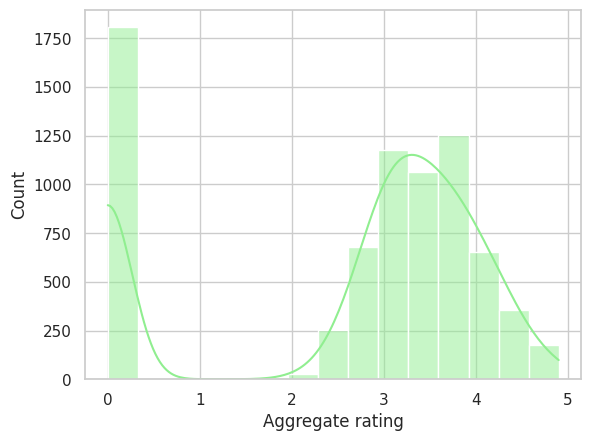

In [122]:
sns.histplot(data['Aggregate rating'], kde=True, bins=15, color='lightgreen')

<Axes: xlabel='Price range', ylabel='count'>

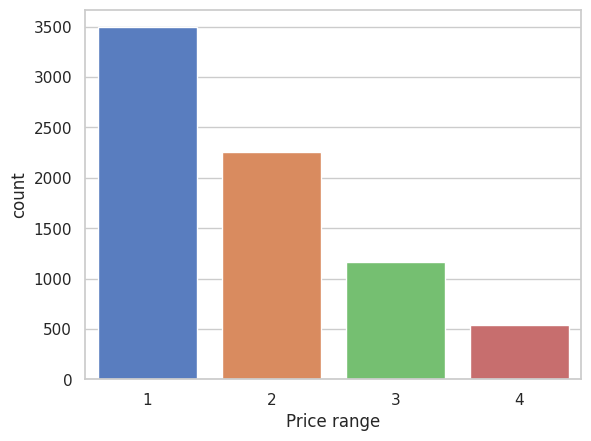

In [139]:
# Count of restaurants by price range
sns.countplot(x='Price range', data = data, palette='muted')

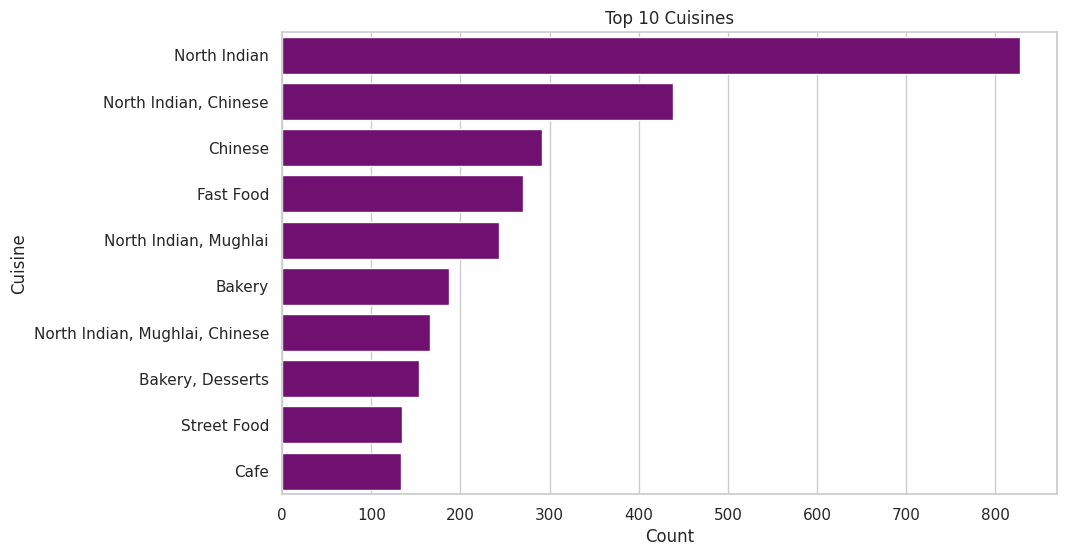

In [127]:
# Plot the top 10 cuisines
top_cuisines = data['Cuisines'].explode().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, color= 'purple')
plt.title('Top 10 Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.show()

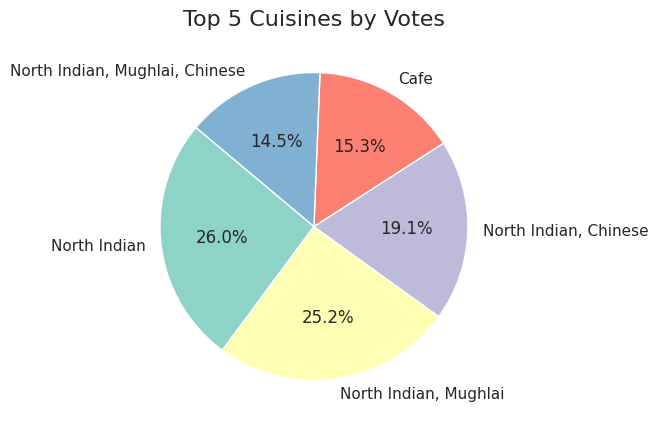

In [128]:
# Top 5 cuisines based on Votes
top_cuisines = (
    data.groupby('Cuisines')['Votes']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

plt.figure(figsize=(5,5))
plt.pie(top_cuisines['Votes'], labels=top_cuisines['Cuisines'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Top 5 Cuisines by Votes', fontsize=16)
plt.show()


In [157]:
# Gather user preferences interactively
preferred_cuisines = input("Enter your preferred cuisines (comma-separated, e.g., Italian, Chinese): ").split(',')
price_range = input("Enter desired price range (e.g., 2 for mid-range, 3 for luxury, separated by commas): ").split(',')
price_range = list(map(int, price_range))  # Convert to integers
min_rating = float(input("Enter minimum rating (e.g., 4.0): "))

Enter your preferred cuisines (comma-separated, e.g., Italian, Chinese): North Indian
Enter desired price range (e.g., 2 for mid-range, 3 for luxury, separated by commas): 2
Enter minimum rating (e.g., 4.0): 4.0


In [158]:
# Content Filtering (cuisines, price range, and rating)
content_filtered = data[
    (data['Cuisines'].str.contains('|'.join(preferred_cuisines), case=False, na=False)) &
    (data['Price range'].isin(price_range)) &
    (data['Aggregate rating'] >= min_rating)
]

In [159]:
# Create a binary vector for cuisines
cuisines = data['Cuisines'].str.split(',').explode().unique()  # Get all unique cuisines
cuisine_dict = {cuisine: idx for idx, cuisine in enumerate(cuisines)}

In [160]:
# cuisine vector for each restaurant
def get_cuisine_vector(cuisines_list):
    vector = np.zeros(len(cuisine_dict))
    for cuisine in cuisines_list.split(','):
        if cuisine.strip() in cuisine_dict:
            vector[cuisine_dict[cuisine.strip()]] = 1
    return vector

In [161]:
data['Cuisine Vector'] = data['Cuisines'].apply(get_cuisine_vector)

In [162]:
data['Price Range Vector'] = data['Price range'].apply(lambda x: [1 if x == i else 0 for i in range(1, 4)])  # Assuming 3 price ranges
data['Rating Vector'] = data['Aggregate rating'].apply(lambda x: [x])  # Using rating as a single feature

In [163]:
data['Feature Vector'] = data.apply(lambda row: np.concatenate([row['Cuisine Vector'], row['Price Range Vector'], row['Rating Vector']]), axis=1)

In [164]:
# Create the user's preference vector
user_cuisine_vector = np.zeros(len(cuisine_dict))
for cuisine in preferred_cuisines:
    if cuisine.strip() in cuisine_dict:
        user_cuisine_vector[cuisine_dict[cuisine.strip()]] = 1

user_price_range_vector = [1 if price in price_range else 0 for price in range(1, 4)]
user_rating_vector = [min_rating]  # Simplified as the minimum rating provided

user_preference_vector = np.concatenate([user_cuisine_vector, user_price_range_vector, user_rating_vector])

In [165]:
# Calculate cosine similarity between user preference vector and restaurant vectors
cosine_similarities = []
for _, row in data.iterrows():
    similarity = cosine_similarity([user_preference_vector], [row['Feature Vector']])
    cosine_similarities.append(similarity[0][0])

In [166]:
data['Cosine Similarity'] = cosine_similarities

In [167]:
# Step 5: Sort the recommendations by cosine similarity, rating, and votes
final_recommendations = data.sort_values(by=['Cosine Similarity', 'Aggregate rating', 'Votes'], ascending=[False, False, False])


Top Recommended Restaurants:

      Restaurant Name      Cuisines  Aggregate rating  Votes  \
702   Kesar Da Dhabha  North Indian               4.1    878   
2360    Gyan Vaishnav  North Indian               3.9     97   
8084      Mirchievous  North Indian               3.9     44   
2114  Tandoor Express  North Indian               4.2     67   
795         Pal Dhaba  North Indian               3.8    982   

      Cosine Similarity  
702            0.999970  
2360           0.999968  
8084           0.999968  
2114           0.999887  
795            0.999865  


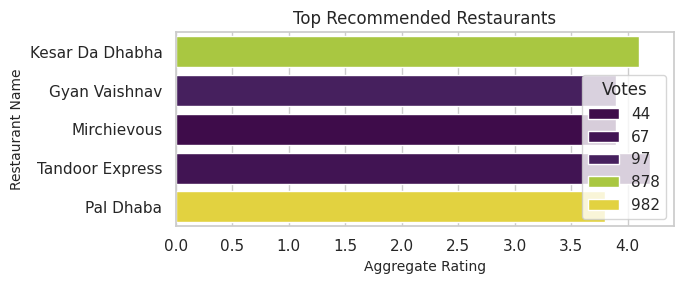

In [168]:
# Display and visualize recommendations
if not final_recommendations.empty:
    top_recommendations = final_recommendations[['Restaurant Name', 'Cuisines', 'Aggregate rating', 'Votes','Cosine Similarity']].head()
    print("\nTop Recommended Restaurants:\n")
    print(top_recommendations)

    # Visualization
    plt.figure(figsize=(7,3))
    sns.barplot(
        data=top_recommendations,
        x='Aggregate rating',
        y='Restaurant Name',
        hue='Votes',
        dodge=False,
        palette='viridis'
    )
    plt.title("Top Recommended Restaurants", fontsize=12)
    plt.xlabel("Aggregate Rating", fontsize=10)
    plt.ylabel("Restaurant Name", fontsize=10)
    plt.legend(title="Votes", loc="lower right")
    plt.tight_layout()
    plt.show()

else:
    print("\nNo restaurants match your preferences.")

The system uses Cosine Similarity to recommend restaurants based on user preferences. It calculates the similarity between the user's preferences (cuisines, price range, and rating) and restaurant features. The user provides their preferences, which are then transformed into vectors. These vectors are compared to those of the restaurants in the dataset. The top recommended restaurants are sorted based on similarity scores and other factors like rating and votes, offering a personalized recommendation based on the user's input.